In [2]:
# Classification of customers
import pandas as pd

In [4]:
data = pd.read_csv("../../data/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.shape

(200, 5)

In [9]:
data.isnull().sum

<bound method DataFrame.sum of      CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]>

In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
# I want to see the relation between annual income and spending score
# rename colunms name
data = data.rename(
    columns={
        'Spending Score (1-100)': "spending_score",
        "Annual Income (k$)" : 'annual_income'
    }
)

In [14]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'annual_income', 'spending_score'], dtype='object')

In [18]:
x = data[['Age', 'spending_score']]
x.head()

,Age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


Text(0, 0.5, 'Spending Score')

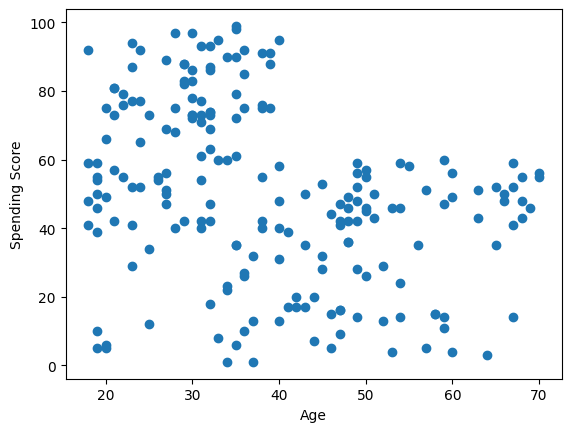

In [23]:
import matplotlib.pyplot as plt
# plot age and spending score
plt.scatter(x['Age'], x['spending_score'])
plt.xlabel("Age")
plt.ylabel("Spending Score")

Text(0, 0.5, 'Spending Score')

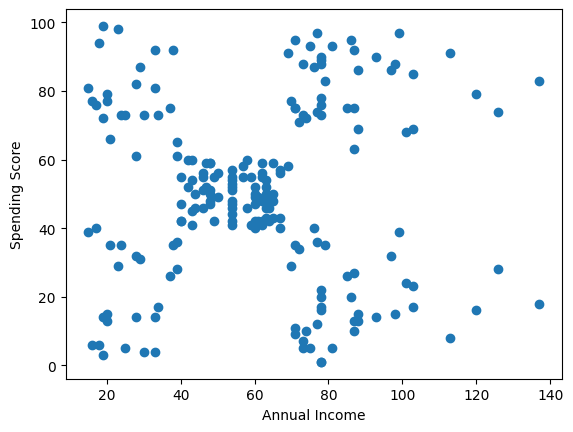

In [25]:
# plot annual income and spending score
plt.scatter(x=data['annual_income'], y=data['spending_score'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")


In [33]:
# fit the k means model
from sklearn.cluster import KMeans
# create the model
model = KMeans(n_clusters=3, random_state=0)
# fit the model
model.fit(x)


KMeans(n_clusters=3, random_state=0)

In [37]:
model.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
# see the cluster centers
labels = model.labels_
print(labels)

[0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 0 1 2 1 2 1 0 0 0 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 0
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [41]:
# see the centers
centers = model.cluster_centers_
print(centers)

[[43.02173913 47.59782609]
 [29.56451613 80.74193548]
 [43.02173913 14.23913043]]


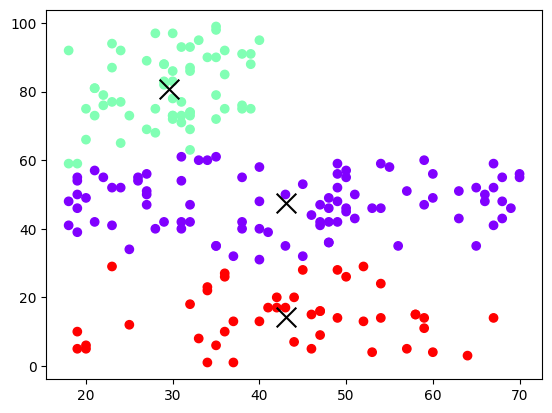

In [44]:
plt.scatter(x.Age, x.spending_score, c=labels, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c="black", marker="x", s=200)

[0]


/home/tilak/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


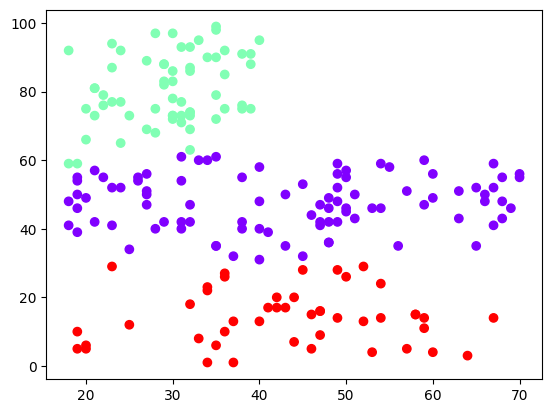

In [ ]:
# predict the cluster
age = 30
spending_score = 50
data = [[age, spending_score]]
predicted = model.predict(data)
print(predicted)

# plot the predicted cluster and highlight it to color yellow
plt.scatter(x.Age, x.spending_score, c=labels, cmap='rainbow')

Text(0, 0.5, 'Spending Score')

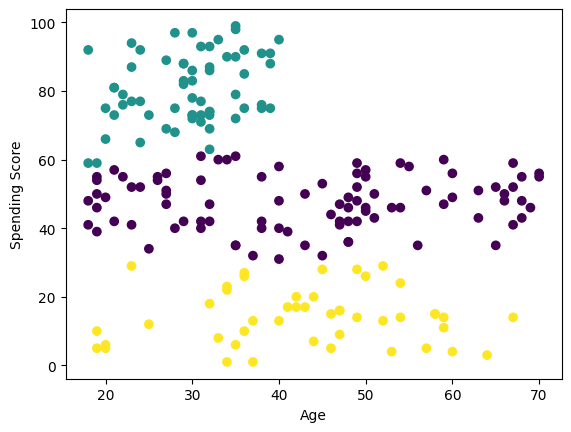

In [34]:
# predict the clusters
predictions = model.predict(x)
# add the predictions to the data
data['cluster'] = predictions
# plot the clusters
plt.scatter(data['Age'], data['spending_score'], c=data['cluster'])
plt.xlabel("Age")
plt.ylabel("Spending Score")

In [32]:
# test the model
from sklearn.metrics import silhouette_score
# calculate the silhouette score
silhouette_score(data[['Age', 'spending_score']], data['cluster'])


0.4537025770427172